In [1]:
# import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline 
plt.style.use('seaborn')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Project outline
Goal of the project is to execute on the 4 tasks below
1. analyze shopper behaviors
2. create shopping cart recommendation system for return customers
3. predict whether customer would like to re-order item they bought before their next purchase
4. show different product recommendation using different user accs to sign in



## Dataset Background
Instacart public dataset released in 2017 (https://www.instacart.com/datasets/grocery-shopping-2017)
In Instacart medium post, they provided more info about the dataset and motivation on why Instacart released the dataset (https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2).

The dataset has more than 3M grocery orders for more than 200k Instacart customers.

Data Dictionary could be found at https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b.
The data file comes with 6 csv files.

In [2]:
#Load all CSVs 
#creating variable names as a short way to refer to each of the cell tabs
#make sure the .csv files are in the same folder as the jupyter notebook- do not store the .csv in another folder otherwise will trigger permission error
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [3]:
#looking at our data
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
aisles.shape
#we know theres 134 aisles

(134, 2)

In [5]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
departments.shape
#there are 21 unique departments

(21, 2)

In [8]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
order_products_prior.shape

(32434489, 4)

In [10]:
len(order_products_prior.order_id.unique())

3214874

In [11]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [12]:
order_products_train.shape

(1384617, 4)

In [13]:
len(order_products_train.order_id.unique())

131209

In [14]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [15]:
orders.shape

(3421083, 7)

# products

In [16]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [17]:
products.shape

(49688, 4)

# explore more on orders

In [18]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [19]:
print(orders.shape)
print('there are', len(orders[orders.eval_set == 'prior']), 'entries for prior')
print('there are', len(orders[orders.eval_set == 'train']), 'entries for train')
print('there are', len(orders[orders.eval_set == 'test']), 'entries for test')

(3421083, 7)
there are 3214874 entries for prior
there are 131209 entries for train
there are 75000 entries for test


In [20]:
print('there are', len(orders[orders.eval_set == 'prior'].user_id.unique()), 'unique customers in total')
print('there are', len(orders[orders.eval_set == 'train'].user_id.unique()), 'unique customers in train set')
print('there are', len(orders[orders.eval_set == 'test'].user_id.unique()), 'unique customers in test set')

there are 206209 unique customers in total
there are 131209 unique customers in train set
there are 75000 unique customers in test set


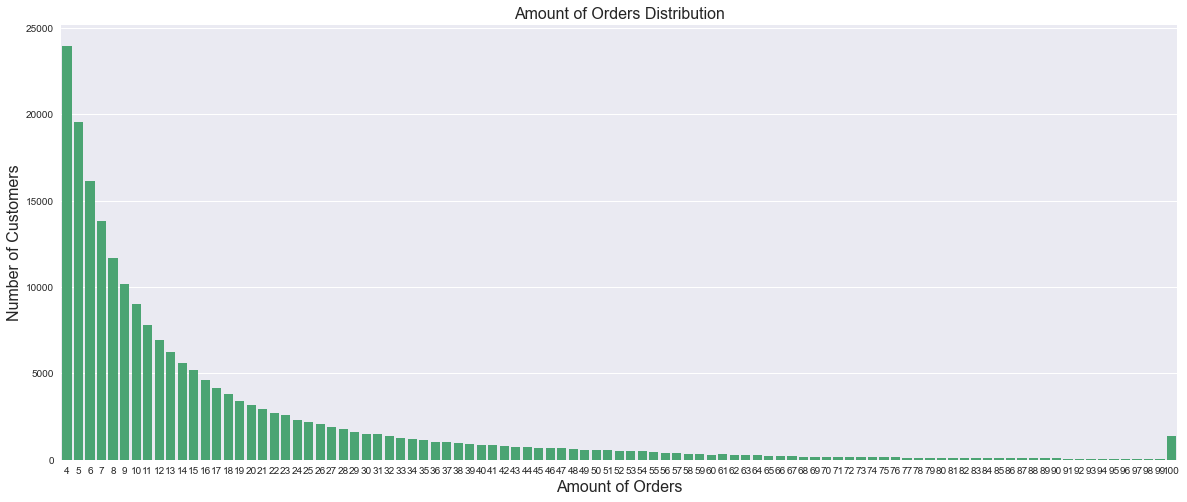

In [21]:
orders_amount_for_customer = orders.groupby('user_id')['order_number'].count().value_counts()

plt.figure(figsize=(20,8))
sns.barplot(x=orders_amount_for_customer.index, y=orders_amount_for_customer.values, color='mediumseagreen')
plt.title('Amount of Orders Distribution', fontsize=16)
plt.ylabel('Number of Customers', fontsize=16)
plt.xlabel('Amount of Orders', fontsize=16)
plt.xticks(rotation='horizontal');

In [22]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [23]:
#convert order_dow into days

days = orders.order_dow.values.tolist()
def get_day():
    res = []
    for day in days:
        if day ==0:
            res.append('Sun')
        elif day ==1:
            res.append('Mon')
        elif day ==2:
            res.append('Tue')
        elif day ==3:
            res.append('Wed')
        elif day ==4:
            res.append('Thur')
        elif day ==5:
            res.append('Fri')
        elif day ==6:
            res.append('Sat')
    return res

In [24]:
z = orders.copy()

In [25]:
z['order_dayofweek']=get_day()

In [26]:
z.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_dayofweek
0,2539329,1,prior,1,2,8,NaN,Tue
1,2398795,1,prior,2,3,7,15.0,Wed
2,473747,1,prior,3,3,12,21.0,Wed
3,2254736,1,prior,4,4,7,29.0,Thur
4,431534,1,prior,5,4,15,28.0,Thur


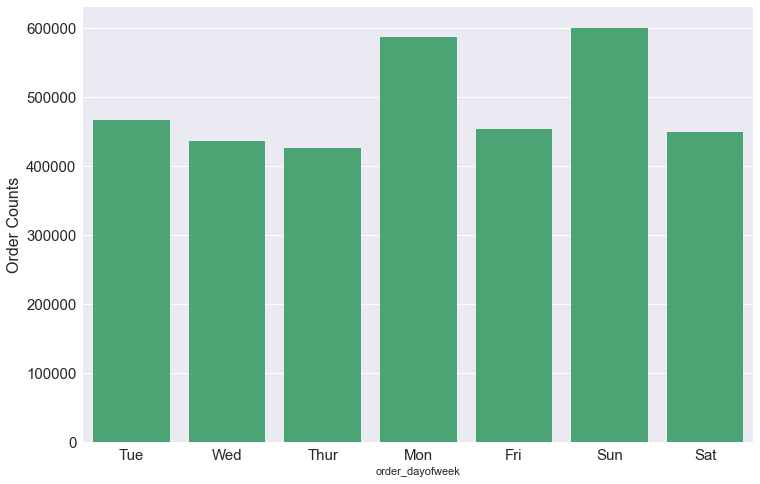

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x=z.order_dayofweek, color='mediumseagreen')

plt.xticks(fontsize=15)
plt.ylabel('Order Counts', fontsize=16)
plt.yticks(fontsize=15);

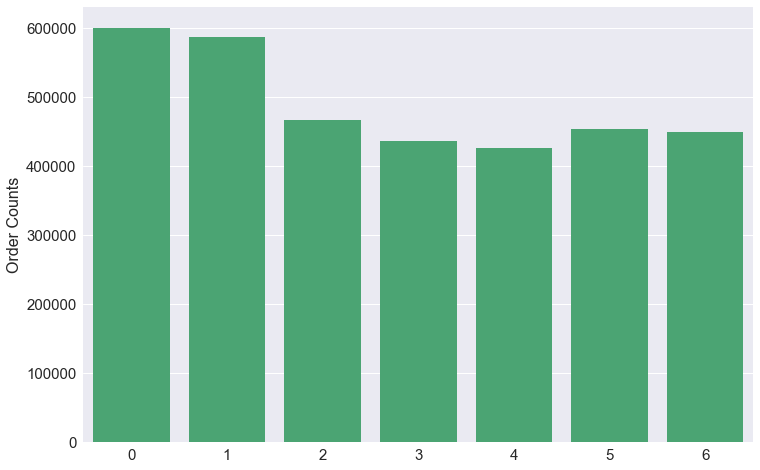

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x=orders.order_dow, color='mediumseagreen')

#plt.title("Order Amounts by Days", fontsize=16)
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=15)
plt.ylabel('Order Counts',fontsize=16)
plt.yticks(fontsize=15);


In [29]:
#0 and 1 (sunday & monday) have the most orders in a week, on thursday its the least amt of orders

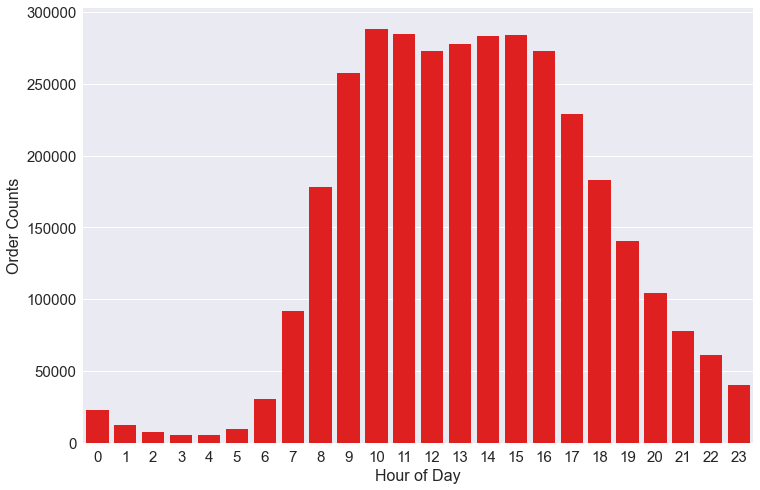

In [30]:
#Now lets analyze time of day

plt.figure(figsize=(12,8))
sns.countplot(x=orders.order_hour_of_day, color='red')

plt.xlabel('Hour of Day', fontsize=16)
plt.xticks(fontsize=15)
plt.ylabel('Order Counts', fontsize=16)
plt.yticks(fontsize=15);

In [31]:
#people tend to order from 8am to 6pm (8-18)

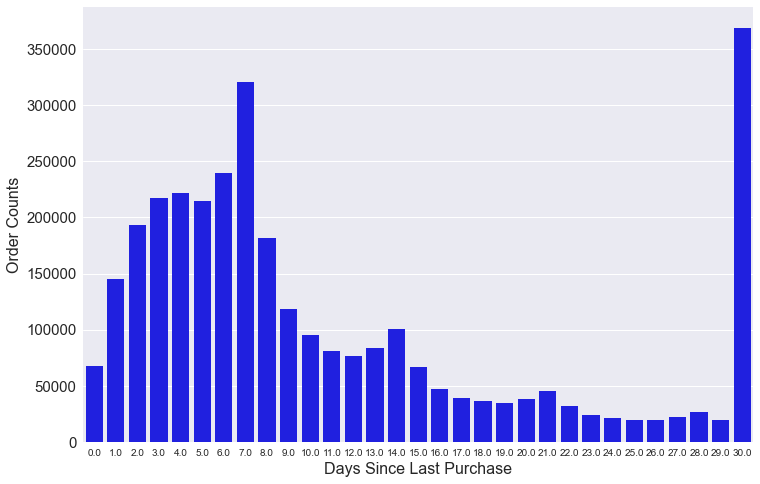

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(x=orders.days_since_prior_order, color='blue')

plt.xlabel('Days Since Last Purchase', fontsize=16)
plt.xticks(fontsize=10)
plt.ylabel('Order Counts', fontsize=16)
plt.yticks(fontsize=15);


In [33]:
#Majority of people order once a week, btwn 0-7
#lots of people who order once more than 30 days ago (buying a one-time thing)

# Exploring on order_product_prior and order product train

In [34]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [35]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [36]:
print(order_products_prior.shape)
print(order_products_train.shape)

(32434489, 4)
(1384617, 4)


In [37]:
order_products_total=pd.concat([order_products_prior, order_products_train])
print(order_products_total.shape)

(33819106, 4)


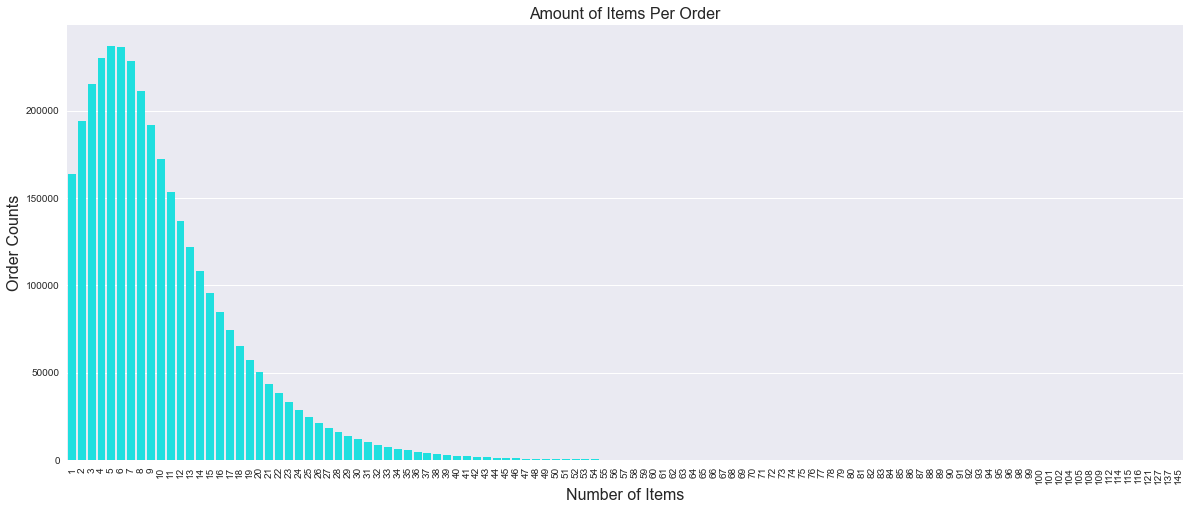

In [38]:
frequency_per_number_of_order = order_products_total.groupby('order_id')['product_id'].count().value_counts()

plt.figure(figsize=(20,8))
sns.barplot(x=frequency_per_number_of_order.index, y=frequency_per_number_of_order.values, color='cyan')
plt.title('Amount of Items Per Order', fontsize=16)
plt.ylabel('Order Counts', fontsize=16)
plt.xlabel('Number of Items', fontsize=16)
plt.xticks(rotation='vertical');

In [39]:
#majority of people purchase 1-10 items per order

In [40]:
print('there are', order_products_total.shape[0], 'grocery products ordered')
print('there are', len(order_products_total.order_id.unique()), 'order transactions')
print('there are', len(order_products_total.product_id.unique()), 'unique products')

there are 33819106 grocery products ordered
there are 3346083 order transactions
there are 49685 unique products


In [41]:
print(len(order_products_total[order_products_total.reordered == 1])/order_products_total.shape[0], 'have reordered before')
print(len(order_products_total[order_products_total.reordered == 0])/order_products_total.shape[0], 'haven\'t reordered before')

red

0.5900617242809434 have reordered before
0.40993827571905656 haven't reordered before


NameError: name 'red' is not defined

In [ ]:
#the split between people who have reordered and haven't is 60-40

# exploring the aisle, department & products files

In [ ]:
aisles.head()

In [ ]:
departments.head()

In [ ]:

products.head()

In [ ]:
#grabbing the dimensions
print(aisles.shape)
print(departments.shape)
print(products.shape)

In [ ]:
#do a merge to combine department and 
products_departments = products.merge(departments, left_on='department_id', right_on='department_id', how='left')
products_departments_aisles = products_departments.merge(aisles, left_on= 'aisle_id',right_on='aisle_id',how='left')
products_departments.head(15)
#products_departments_aisles.head(15)

In [ ]:
products_departments_aisles.head(15)

In [ ]:
products_departments_aisles.groupby('department')['product_id'].count().reset_index().sort_values(by='product_id', ascending=False).head(10)

In [ ]:
#Explore more on products_departments_aisles & order_products_total

In [ ]:
order_products_total.head()

In [ ]:
products_departments_aisles.head()

In [ ]:
df = order_products_total.merge(products_departments_aisles, left_on='product_id', right_on='product_id', how='left')
df.head()

In [ ]:
df.shape

In [ ]:
top_15_products = df.product_name.value_counts(ascending=False).reset_index().head(10)
top_15_products.columns=['product_name','count']
top_15_products

In [ ]:
df.groupby('department')

In [ ]:
reorder_ratio_per_dep = df.groupby('department')['reordered'].mean().reset_index()
reorder_ratio_per_dep.columns = ['department', 'reorder_ratio']
reorder_ratio_per_dep.sort_values(by='reorder_ratio',ascending=False)

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=reorder_ratio_per_dep.department, y=reorder_ratio_per_dep.reorder_ratio, color='magenta')
plt.title('Reorder Ratio Per Department', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.xticks(fontsize=15)
plt.xticks(rotation='vertical')
plt.ylabel('Reorder Ratio', fontsize=16)
plt.yticks(fontsize=15);

In [ ]:
#dairy eggs has highest reorder ratio
#personal care has the least reorder ratio

In [ ]:
df.head()

In [ ]:
reorder_ratio_per_aisle = df.groupby('aisle')['reordered'].mean().reset_index()
reorder_ratio_per_aisle.columns = ['aisle', 'reorder_ratio']
reorder_ratio_per_aisle.sort_values(by='reorder_ratio',ascending=False)

In [ ]:
#milk has the highest reorder ratio
#spices has the least reorder ratio

In [ ]:
top_15_reorder_items = df.groupby('product_name')['reordered'].sum().reset_index().sort_values(by='reordered', ascending = False).head(15)
top_15_reorder_items

In [ ]:
df.head()

In [ ]:
add_to_cart_order_reordered_ratio = df.groupby('add_to_cart_order')['reordered'].mean().reset_index()
add_to_cart_order_reordered_ratio.head()

In [ ]:
plt.figure(figsize=(25,8))
sns.pointplot(add_to_cart_order_reordered_ratio.add_to_cart_order, add_to_cart_order_reordered_ratio.reordered, color='orange')
plt.title('Add to Cart Order vs Reorder Ratio', fontsize=16)
plt.xlabel('Add To Cart Order', fontsize=16)
plt.xticks(fontsize=15)
plt.xticks(rotation='horizontal')
plt.ylabel('Reorder Ratio', fontsize=16)
plt.yticks(fontsize=15);

#how to fix the tickers here


# looking at what items ordered before noon, what items ordered after noon

In [ ]:
# remove any rows referring to the test set
df_orders = orders[orders.eval_set != 'test']

# drop the eval_set column
df_orders = df_orders.drop(['eval_set'], axis=1)

# concatenate the _prior and _train datasets
df_order_products = pd.concat([order_products_prior, order_products_train])

# expand every order_id with the list of product_ids in that order_id
temp = df_orders.merge(df_order_products, on='order_id')
temp.head()

In [ ]:
##keep only top 2000 products
top_products = pd.DataFrame({'total_count': temp.groupby('product_id').size()}).sort_values('total_count', ascending=False).reset_index()[:2000]
top_products = top_products.merge(products,on='product_id')
top_products = top_products.merge(products, on='product_id')
top_products.head()

In [ ]:
#keep only observations that have products in top_products
temp = temp.loc[temp['product_id'].isin(top_products-product_id)]

In [ ]:
product_orders_by_hour = pd.DataFrame({'count': temp.groupby(['product_id', 'order_hour_of_day']).size()}).reset_index()
product_orders_by_hour['pct'] = product_orders_by_hour.groupby('product_id')['count'].apply(lambda x: x/x.sum()*100)
product_orders_by_hour.head(24)

In [ ]:
mean_hour = pd.DataFrame({'mean_hour': product_orders_by_hour.groupby('product_id').apply(lambda x: sum(x['order_hour_of_day'] * x['count'])/sum(x['count']))}).reset_index()
mean_hour.head()

In [ ]:
morning = mean_hour.sort_values('mean_hour')[:25]
morning = morning.merge(products, on='product_id')
morning.head()

In [ ]:
afternoon = mean_hour.sort_values('mean_hour', ascending=False)[:25]
afternoon = afternoon.merge(products, on='product_id')
afternoon.head()

In [ ]:
morning_pct = product_orders_by_hour.merge(morning, on='product_id').sort_values(['mean_hour', 'order_hour_of_day'])
afternoon_pct = product_orders_by_hour.merge(afternoon, on='product_id').sort_values(['mean_hour', 'order_hour_of_day'], ascending=False

In [ ]:

# get list of morning and afteroon product names
morning_product_names = list(morning_pct['product_name'].unique())
morning_product_names = '\n'.join(morning_product_names)
afternoon_product_names = list(afternoon_pct['product_name'].unique())
afternoon_product_names = '\n'.join(afternoon_product_names)

# hack to remove 'Variety Pack' from Orange & Lemon Flavor Variety Pack Sparkling Fruit Beverage
morning_product_names = morning_product_names.replace('Variety Pack ', '')

In [ ]:
# Figure Size
fig, ax = plt.subplots(figsize=(16, 10))

# Plot
morning_pct.groupby('product_id').plot(x='order_hour_of_day', 
                                       y='pct', 
                                       ax=ax, 
                                       legend=False,
                                       alpha=0.2,
                                       aa=True,
                                       color='darkgreen',
                                       linewidth=1.5,)
afternoon_pct.groupby('product_id').plot(x='order_hour_of_day', 
                                         y='pct', 
                                         ax=ax, 
                                         legend=False,
                                         alpha=0.2,
                                         aa=True,
                                         color='red',
                                         linewidth=1.5,)

# Aesthetics
# Margins
plt.margins(x=0.5, y=0.05)

# Hide spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Labels
label_font_size = 14
plt.xlabel('Hour of Day Ordered', fontsize=label_font_size)
plt.ylabel('Percent of Orders by Product', fontsize=label_font_size)

# Tick Range
tick_font_size = 12
ax.tick_params(labelsize=tick_font_size)
plt.xticks(range(0, 25, 2))
plt.yticks(range(0, 16, 5))
plt.xlim([-2, 28])

# Vertical line at noon
plt.vlines(x=12, ymin=0, ymax=15, alpha=0.5, color='gray', linestyle='dashed', linewidth=1.0)

# Text
text_font_size = 12
ax.text(0.01, 0.95, morning_product_names,
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='darkgreen', fontsize=text_font_size)
ax.text(0.99, 0.95, afternoon_product_names,
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='darkred', fontsize=text_font_size);